In [30]:
from sklearn.preprocessing import MinMaxScaler
import numpy as np
import pandas as pd 
import matplotlib.pylab as plt
import math
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from keras.layers.core import Dense, Activation
from keras.models import Sequential
from keras.layers.recurrent import LSTM
from keras.models import Sequential
import tensorflow as tf
from tensorflow import keras
from sklearn.preprocessing import MinMaxScaler
from keras.callbacks import EarlyStopping
from keras.layers import Dense, Dropout
from keras.models import Sequential
import numpy as np

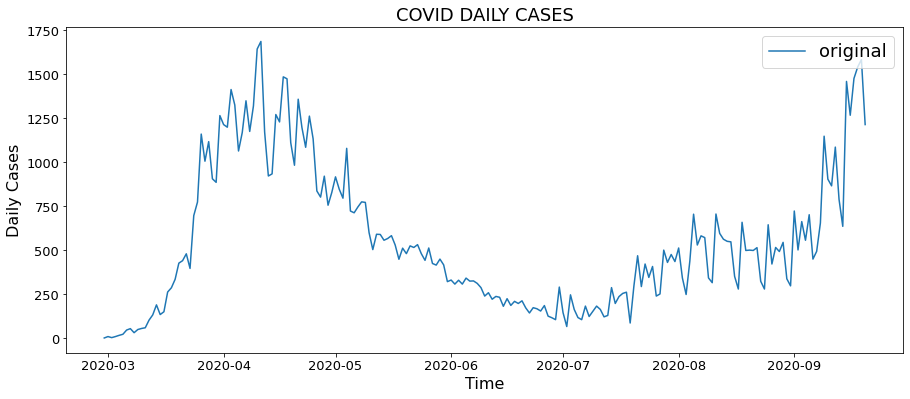

In [31]:
ts_data = pd.read_csv('Covid_19_train.csv')
ts_data['Time'] = pd.to_datetime(ts_data['Time'])
ts_data.set_index('Time', inplace= True)
ts= ts_data['Daily_cases']
plt.figure(figsize=(15,6))
plt.plot(ts[:], label='original')
plt.title('COVID DAILY CASES', size=18)
plt.legend(loc='upper right', fontsize=18)
plt.xlabel('Time', size=16) 
plt.ylabel('Daily Cases', size=16)
plt.tick_params(labelsize=13)
plt.savefig('COVID DAILY CASES ORIGINAL', 
            bbox_inches='tight', dpi=300, pad_inches=0.0)
plt.show()

In [32]:
ts.astype(int)

Time
2020-02-29       1
2020-03-01       9
2020-03-02       3
2020-03-03       9
2020-03-04      16
              ... 
2020-09-16    1266
2020-09-17    1475
2020-09-18    1540
2020-09-19    1582
2020-09-20    1213
Name: Daily_cases, Length: 205, dtype: int32

In [33]:
ts_log = np.log(ts)

In [34]:
ts.tail(5)

Time
2020-09-16    1266.0
2020-09-17    1475.0
2020-09-18    1540.0
2020-09-19    1582.0
2020-09-20    1213.0
Name: Daily_cases, dtype: float64

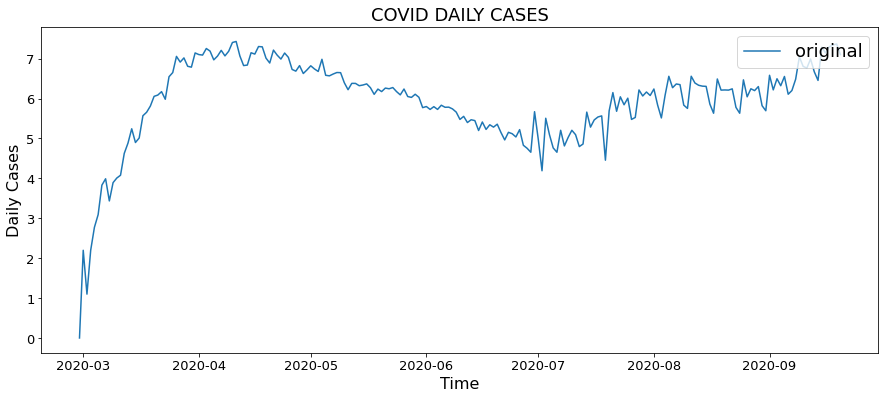

In [35]:
plt.figure(figsize=(15,6))
plt.plot(ts_log[:], label='original')
plt.title('COVID DAILY CASES', size=18)
plt.legend(loc='upper right', fontsize=18)
plt.xlabel('Time', size=16) 
plt.ylabel('Daily Cases', size=16)
plt.tick_params(labelsize=13)
plt.savefig('COVID DAILY CASES LOG', 
            bbox_inches='tight', dpi=300, pad_inches=0.0)
plt.show()

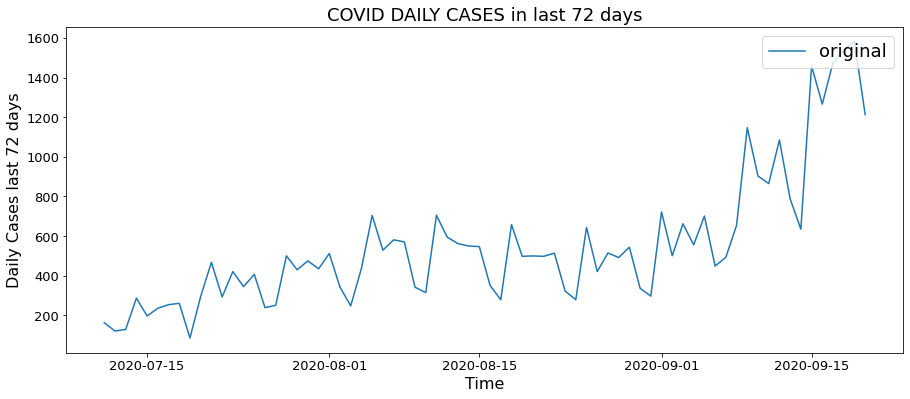

In [36]:
plt.figure(figsize=(15,6))
plt.plot(ts[-72:], label='original')
plt.title('COVID DAILY CASES in last 72 days', size=18)
plt.legend(loc='upper right', fontsize=18)
plt.xlabel('Time', size=16) 
plt.ylabel('Daily Cases last 72 days', size=16)
plt.tick_params(labelsize=13)
plt.savefig('COVID DAILY CASES LOG in last 72 days', 
            bbox_inches='tight', dpi=300, pad_inches=0.0)
plt.show()

In [37]:
# Function to calculate MSE
def mse(x, y):
    return np.mean(np.power(x - y,2))

# Create x-axis for the plots
import datetime
start = datetime.datetime(2020, 2, 29)
end = datetime.datetime(2020, 9, 20)
x = pd.date_range(start, end, freq='D')

# MOVING AVERAGE

In [38]:
#FOR ADDITIVE

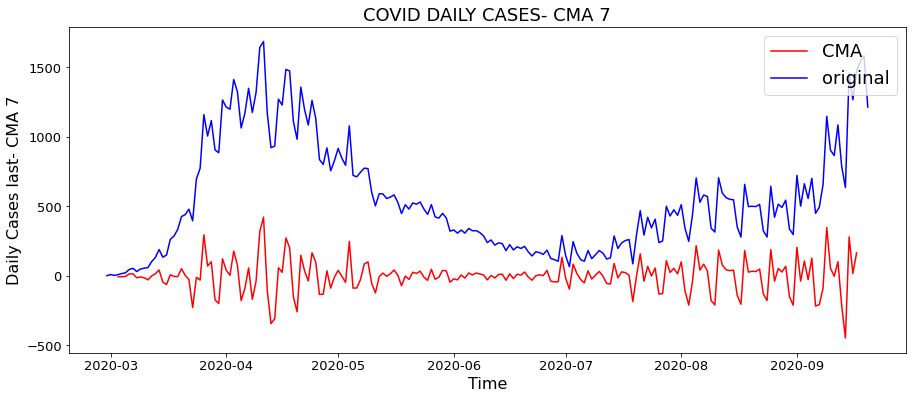

In [39]:
# Estimate the trend component using CMA-30 to check stationarity
Trend = ts.rolling(7, center = True).mean()

# De-trend the data to obtain the estimate of the seasonal component 
ts_detrend = ts - Trend

plt.figure(figsize=(15,6))
plt.plot(ts_detrend, label='CMA', color = 'red')
plt.plot(ts, label='original', color = 'blue')
plt.title('COVID DAILY CASES- CMA 7', size=18)
plt.legend(loc='upper right', fontsize=18)
plt.xlabel('Time', size=16) 
plt.ylabel('Daily Cases last- CMA 7', size=16)
plt.tick_params(labelsize=13)
plt.savefig('COVID DAILY CASES- CMA 7', 
            bbox_inches='tight', dpi=300, pad_inches=0.0)
plt.show()

Results of Dickey-Fuller Test:
Test Statistic                -6.237013e+00
pvalue                         4.798171e-08
#Lags Used                     1.200000e+01
Number of Observations Used    1.920000e+02
Critical Value (1%)           -3.464875e+00
Critical Value (5%)           -2.876714e+00
Critical Value (10%)          -2.574859e+00
dtype: float64


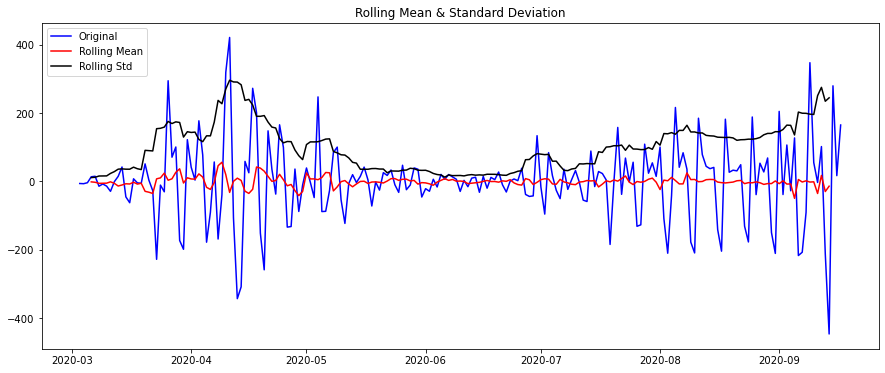

In [40]:
#Check Stationarity
from statsmodels.tsa.stattools import adfuller
def test_stationarity(timeseries):
    # Perform Dickey-Fuller test:
    print('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    
    # Print test outputs
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','pvalue','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print(dfoutput)

def plot_curve(timeseries):
    # Determing rolling statistics
    rolmean = timeseries.rolling(7,center=True).mean()
    rolstd = timeseries.rolling(7,center=True).std()

    # Plot rolling statistics:
    plt.figure(figsize=(15,6))
    plt.plot(timeseries, color='blue',label='Original')
    plt.plot(rolmean, color='red', label='Rolling Mean')
    plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show()
    
ts_zero = np.nan_to_num(ts_detrend)
test_stationarity(ts_zero)
plot_curve(ts_detrend)

In [41]:
ts.skew()

0.8753498736941171

In [42]:
ts_log.skew()

-1.9231070824515986

In [43]:
ts.kurtosis()

-0.07853066423912747

In [44]:
ts_log.kurtosis()

6.420610265516665

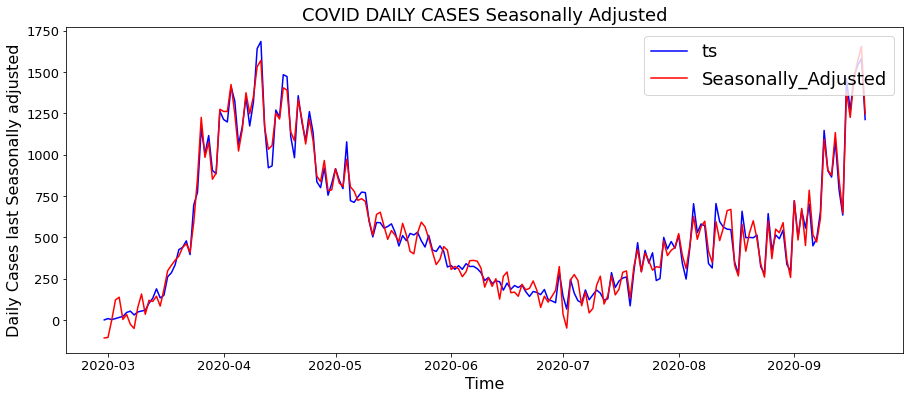

In [45]:
# Calculate the seasonal index
#Seasonality exists after every 41 days of cycle
monthly_S = np.reshape(ts_zero, (-1,41)) 

# Calculate the monthly average of seasonal index
monthly_avg = np.mean(monthly_S[1:-1,:], axis=0)

# Normalize the seasonal index
mean_allmonth = monthly_avg.mean()
monthly_avg_normalized = monthly_avg - mean_allmonth
#print(monthly_avg_normalized.mean())

# Replicate the normalized seasonal index array 12 times
tiled_avg = np.tile(monthly_avg_normalized, 5)

# Subtract the seasonal average from the original data to obtain the seasonal adjusted data
seasonally_adjusted = ts - tiled_avg

plt.figure(figsize=(15,6))
plt.plot(ts, label='ts', color = 'blue')
plt.plot(seasonally_adjusted, label='Seasonally_Adjusted', color = 'red')
plt.title('COVID DAILY CASES Seasonally Adjusted', size=18)
plt.legend(loc='upper right', fontsize=18)
plt.xlabel('Time', size=16) 
plt.ylabel('Daily Cases last Seasonally adjusted', size=16)
plt.tick_params(labelsize=13)
plt.savefig('COVID DAILY CASES- Seasonally adjusted', 
            bbox_inches='tight', dpi=300, pad_inches=0.0)
plt.show()

In [46]:
len(tiled_avg)

205

In [47]:
seasonal_adjusted = ts - tiled_avg

In [48]:
Trend_final = seasonal_adjusted.rolling(7, 
          center = True).mean()

In [49]:
# Check the residual
residual = ts_log - Trend_final - tiled_avg

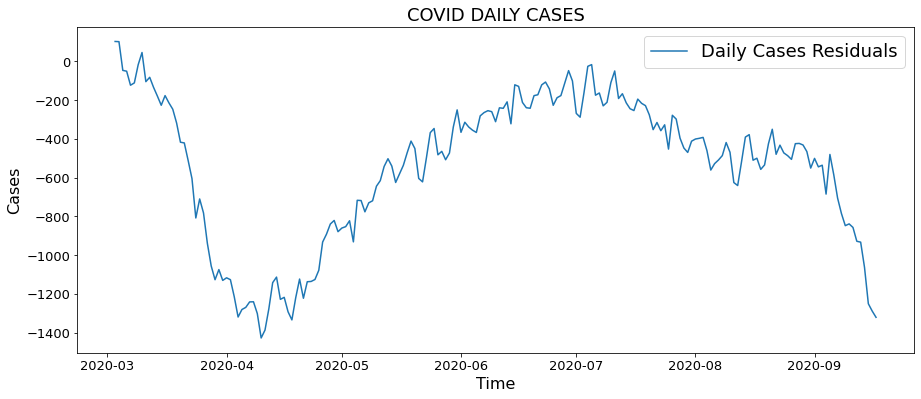

In [50]:
# Plot the residual
plt.figure(figsize=(15,6))
plt.plot(residual, label='Daily Cases Residuals')
plt.title('COVID DAILY CASES', size=18)
plt.xlabel('Time', size=16) 
plt.ylabel('Cases', size=16)
plt.legend(loc='upper right', fontsize=18)
plt.tick_params(labelsize=13)
plt.savefig('Daily Cases Residual.png', 
            bbox_inches='tight', dpi=300, pad_inches=0.0)
plt.show() # Some patterns can still be identified

In [51]:
# Estimate the cycle component
Cycle_final = residual.rolling(7, 
          center = True).mean()

In [52]:
# Calculate the residual again
residual_updated = ts_log - Trend_final - Cycle_final - tiled_avg

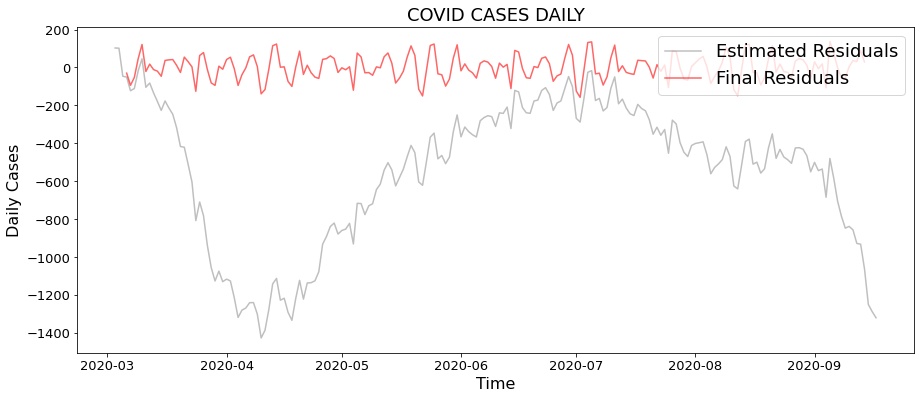

In [53]:
# Plot the residual again
plt.figure(figsize=(15,6))
plt.plot(residual,label='Estimated Residuals',color="grey",alpha=0.5) # Some patterns can still be identified
plt.plot(residual2,label='Final Residuals',color="red",alpha=0.6) # much better now
plt.title('COVID CASES DAILY', size=18)
plt.xlabel('Time', size=16) 
plt.ylabel('Daily Cases', size=16)
plt.legend(loc='upper right', fontsize=18)
plt.tick_params(labelsize=13)
plt.savefig('Estimated Residuals.png', 
            bbox_inches='tight', dpi=300, pad_inches=0.0)
plt.show()


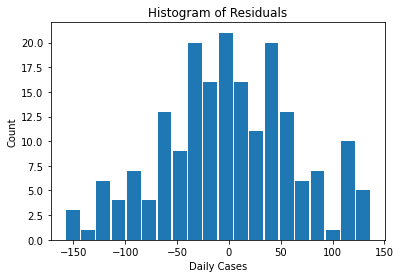

In [54]:
# Histogram of residual
residual_updated.plot.hist(grid=False, bins=20, rwidth=0.9)
plt.title('Histogram of Residuals')
plt.xlabel('Daily Cases')
plt.ylabel('Count')
plt.savefig('Histogram of Residuals.png', 
            bbox_inches='tight', dpi=300, pad_inches=0.0)
plt.show()

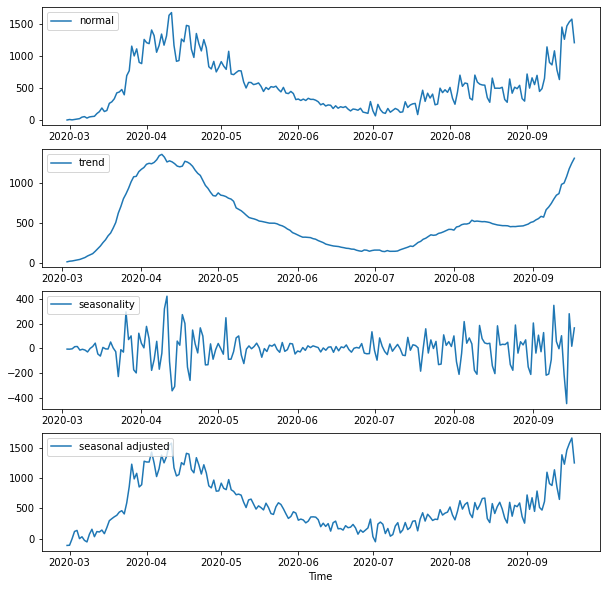

In [55]:
# Plot the seasonally adjusted data:
fig, ax = plt.subplots(4, 1,figsize=(10,10))
ax[0].plot(ts)
ax[1].plot(Trend)
ax[2].plot(ts_detrend)
ax[3].plot(seasonally_adjusted)
ax[0].legend(['normal'], loc=2)
ax[1].legend(['trend'], loc=2)
ax[2].legend(['seasonality'], loc=2)
ax[3].legend(['seasonal adjusted'], loc=2)
plt.xlabel('Time')
plt.show()

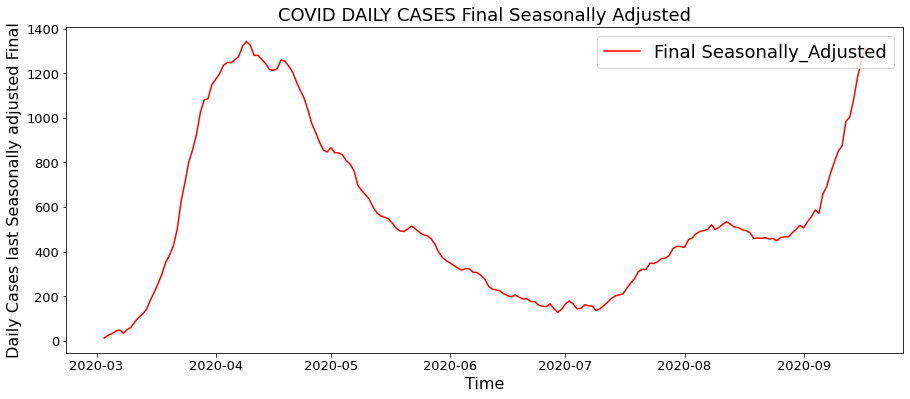

In [57]:
#Smoothing the adjusted seasonality
Trend_final = seasonally_adjusted.rolling(7, center=True).mean()
plt.figure(figsize=(15,6))
plt.plot(Trend_final, label='Final Seasonally_Adjusted', color = 'red')
plt.title('COVID DAILY CASES Final Seasonally Adjusted', size=18)
plt.legend(loc='upper right', fontsize=18)
plt.xlabel('Time', size=16) 
plt.ylabel('Daily Cases last Seasonally adjusted Final', size=16)
plt.tick_params(labelsize=13)
plt.savefig('COVID DAILY CASES- Seasonally adjusted Final', 
            bbox_inches='tight', dpi=300, pad_inches=0.0)
plt.show()

# LINEAR

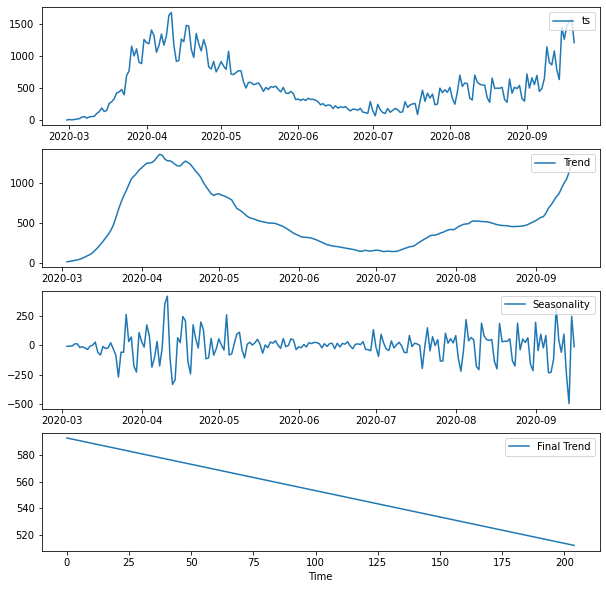

In [88]:
X = np.linspace(1, len(seasonally_adjusted), len(seasonally_adjusted)) # Create time indexes
X = np.reshape(X, (len(seasonally_adjusted), 1))  # Transform X to 2D array (matrix)
y = seasonally_adjusted.values.reshape(len(seasonally_adjusted),1)  # Transform y to 2D array (matrix)

from sklearn.linear_model import LinearRegression # For Linear Regression
lm = LinearRegression()   #On seasonal adjusted additive data

# Train the linear regression model on training data (X,y)
lm.fit(X, y)

# Obtain estimation for the trend using the trained linear model
linear_trend = lm.predict(np.reshape(np.arange(len(seasonally_adjusted)), (len(seasonally_adjusted),1)))

fig, ax = plt.subplots(4, 1,figsize=(10,10))
ax[0].plot(ts)
ax[1].plot(Trend)
ax[2].plot(ts_detrend)
ax[3].plot(linear_trend)
ax[0].legend(['ts'], loc=1)
ax[1].legend(['Trend'], loc=1)
ax[2].legend(['Seasonality'], loc=1)
ax[3].legend(['Final Trend'], loc=1)
plt.xlabel('Time')
plt.show()

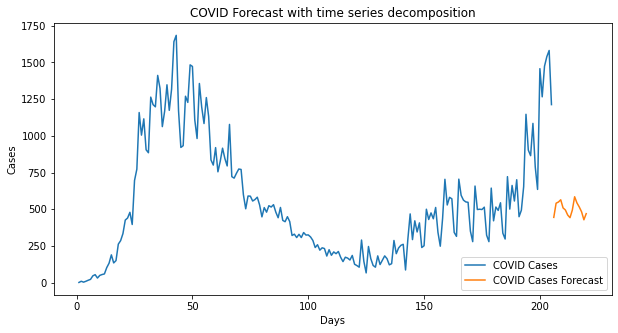

In [89]:
#FORECAST
num_test = 15   # Out-of-sample size (15 days)
X_test = np.arange(len(X)+1,len(X)+1+num_test)

# Forecast the trend component. Make sure that the input of predict() is a 2D array
Trend_forecast = lm.predict(np.reshape(X_test,(len(X_test),1)))

# Forecast the seasonal component in the next 15 days 
S_tiled_avg = np.tile(monthly_avg_normalized, 5)

# Forecast cases
cases_forecast = (Trend_forecast + np.reshape(S_tiled_avg[-num_test:],(num_test,1)))

plt.figure(figsize=(10,5))
plt.plot(X, ts, label="COVID Cases")
plt.plot(X_test,cases_forecast, linestyle='-', label="COVID Cases Forecast")
plt.title("COVID Forecast with time series decomposition")
plt.xlabel("Days")
plt.ylabel("Cases")
plt.legend()
plt.show()

In [336]:
test = pd.read_csv('Covid_19_test.csv')

In [337]:
X_test = test['Daily_cases']
x_test = X_test.to_numpy(X_test)
y = mse(x_test,cases_forecast)
y

245747.75311287775

In [92]:
lm.coef_

array([[-0.39338324]])

In [93]:
lm.intercept_

array([592.53310788])

In [338]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing
fit_add = ExponentialSmoothing(ts, seasonal_periods=7, trend='add', seasonal='add').fit() # Holt-Winters additive smoothing
fit_mul = ExponentialSmoothing(ts, seasonal_periods=7, trend='add', seasonal='mul').fit() # Holt-Winters multiplicative smoothing

C:\Users\91999\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
C:\Users\91999\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:712: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  ConvergenceWarning)
C:\Users\91999\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


In [339]:
# symbol r $ and \ in the results variable are the latex symbols for visualization in notebook
results = pd.DataFrame(index=[r"$\alpha$",\
                              r"$\beta$",\
                              r"$\gamma$",\
                              r"$l_0$",\
                              "$b_0$",\
                              "SSE"])
# ExponentialSmoothing() object has following attributes
params = ['smoothing_level', \
          'smoothing_slope', \
          'smoothing_seasonal', \
          'initial_level', \
          'initial_slope']

# check out the performance of additive and multiplicative
results["Additive"]       = [fit_add.params[p] for p in params] + [fit_add.sse]
results["Multiplicative"] = [fit_mul.params[p] for p in params] + [fit_mul.sse]
print(results)

              Additive  Multiplicative
$\alpha$  2.420711e-01    2.795161e-01
$\beta$   2.420670e-01    2.387429e-01
$\gamma$  3.229620e-01    1.303819e-01
$l_0$     6.143873e+02    6.169331e+02
$b_0$     7.302460e+00    7.674194e+00
SSE       3.123561e+06    2.361237e+06


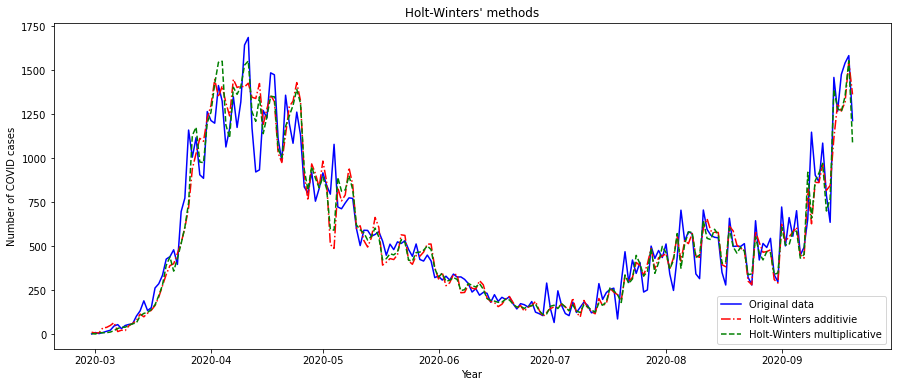

In [340]:
smooth_add = fit_add.fittedvalues
smooth_mul = fit_mul.fittedvalues

# Plot all together
plt.figure(figsize=(15,6))
plt.plot(ts, 'b-', label = 'Original data')
plt.plot(smooth_add, 'r-.',label = 'Holt-Winters additivie')
plt.plot(smooth_mul, 'g--', label = 'Holt-Winters multiplicative')
plt.xlabel("Year")
plt.ylabel("Number of COVID cases")
plt.title("Holt-Winters' methods")
plt.legend()
plt.show()


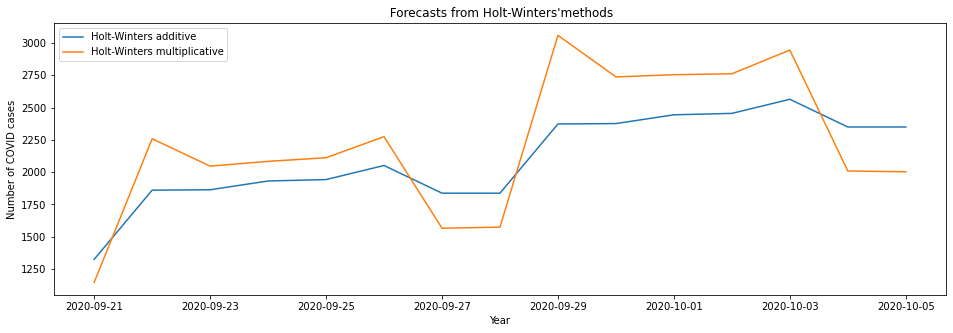

In [341]:
# Forecast 15 more data points
y_forecast_add = fit_add.forecast(15)# .rename('Holt-Winters (addadd-seasonal)')
y_forecast_mul = fit_mul.forecast(15)

# And plot al together
plt.figure(figsize=(16,5))
plt.plot(y_forecast_add, label = 'Holt-Winters additive')
plt.plot(y_forecast_mul, label = 'Holt-Winters multiplicative')
plt.xlabel("Year")
plt.ylabel("Number of COVID cases")
plt.title(" Forecasts from Holt-Winters'methods")
plt.legend()
plt.show()

In [342]:
mse_add_holt = mse(y_forecast_add,x_test)
mse_add_holt

4500679.07288548

In [343]:
mse_mul_holt = mse(y_forecast_mul,x_test)
mse_mul_holt

5181170.647012035

# ARIMA and SARIMAX

In [127]:
# Take the difference
diff_ts_2 = pd.Series.diff(ts, periods=2)
diff_data_2 = diff_ts_2.dropna()
diff_ts = pd.Series.diff(ts)
diff_data = diff_ts.dropna()

In [130]:
# Take the log_diff
log_diff_ts = pd.Series.diff(ts_log)
log_diff_data = log_diff_ts.dropna()

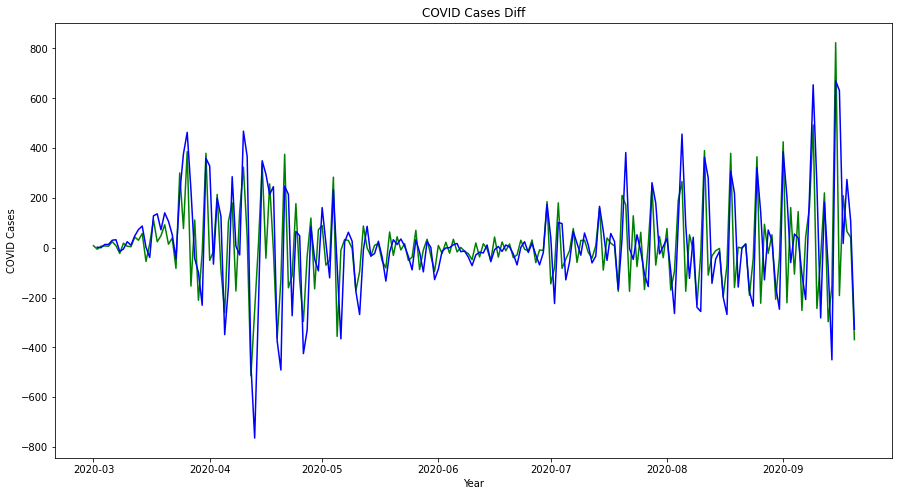

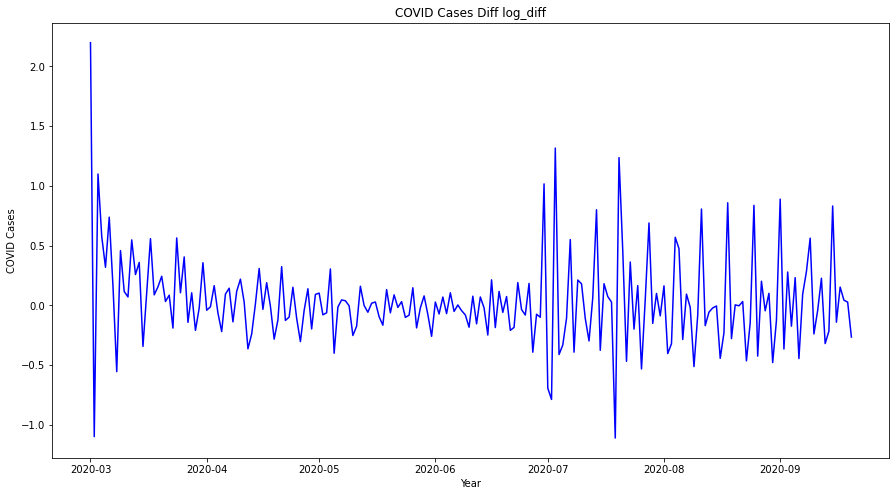

In [131]:
# Plot the data difference transformed
plt.figure(figsize=(15,8))
plt.plot(diff_data, 'g-', label="COVID Cases_data_diff")
plt.plot(diff_data_2, 'b-', label="COVID Cases_data_diff")
plt.xlabel('Year')
plt.ylabel('COVID Cases')
plt.title('COVID Cases Diff')
plt.show()



# Plot the data difference log transformed
plt.figure(figsize=(15,8))
plt.plot(log_diff_data, 'b-', label="COVID Cases_data_log_diff")
plt.xlabel('Year')
plt.ylabel('COVID Cases')
plt.title('COVID Cases Diff log_diff')
plt.show()

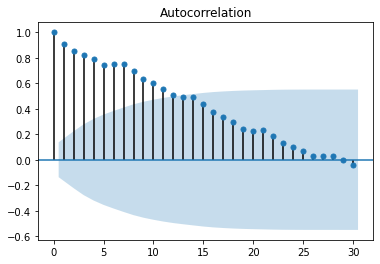

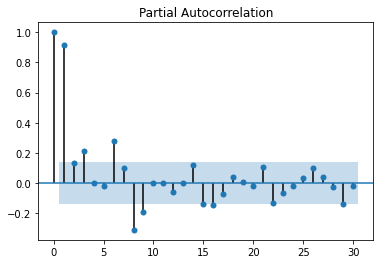

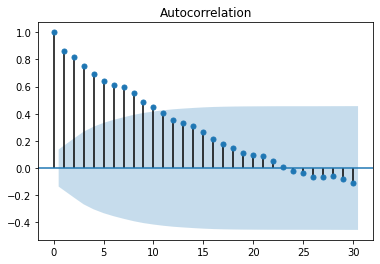

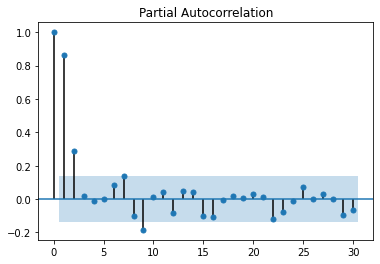

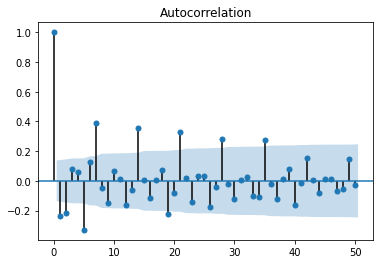

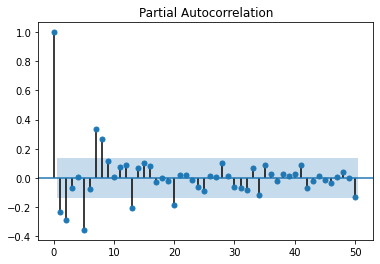

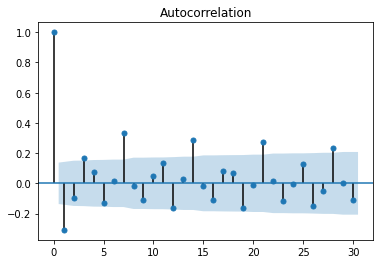

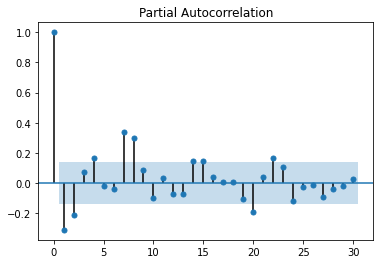

In [132]:
# Check for stationarity 
import statsmodels as sm
import statsmodels.api as smt
from statsmodels.tsa.statespace.sarimax import SARIMAX

# Original dataset
smt.graphics.tsa.plot_acf(ts, lags=30, alpha = 0.05)
smt.graphics.tsa.plot_pacf(ts, lags=30, alpha=0.05)
plt.show()

# log transformed dataset
smt.graphics.tsa.plot_acf(ts_log, lags=30, alpha = 0.05)
smt.graphics.tsa.plot_pacf(ts_log, lags=30, alpha=0.05)
plt.show()

# Data difference transformed --> this is the best approach 
smt.graphics.tsa.plot_acf(diff_data, lags=50, alpha = 0.05)
smt.graphics.tsa.plot_pacf(diff_data, lags=50, alpha=0.05)
plt.show()

# Data difference log transformed
smt.graphics.tsa.plot_acf(log_diff_data, lags=30, alpha = 0.05)
smt.graphics.tsa.plot_pacf(log_diff_data, lags=30, alpha=0.05)
plt.show()

C:\Users\91999\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
C:\Users\91999\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
No handles with labels found to put in legend.


2020-09-07    452.932560
2020-09-08    714.377602
2020-09-09    587.398401
2020-09-10    677.678639
2020-09-11    615.768074
2020-09-12    699.532052
2020-09-13    554.441055
2020-09-14    556.732349
2020-09-15    707.426789
2020-09-16    634.216086
2020-09-17    686.260962
2020-09-18    650.572896
2020-09-19    698.861189
2020-09-20    615.219669
2020-09-21    616.540422
Freq: D, dtype: float64
BIC Seasonal ARIMA: 2482.17119497695
AIC Seasonal ARIMA: 2462.5331976255675
MSE Seasonal ARIMA: 296680.6146291656


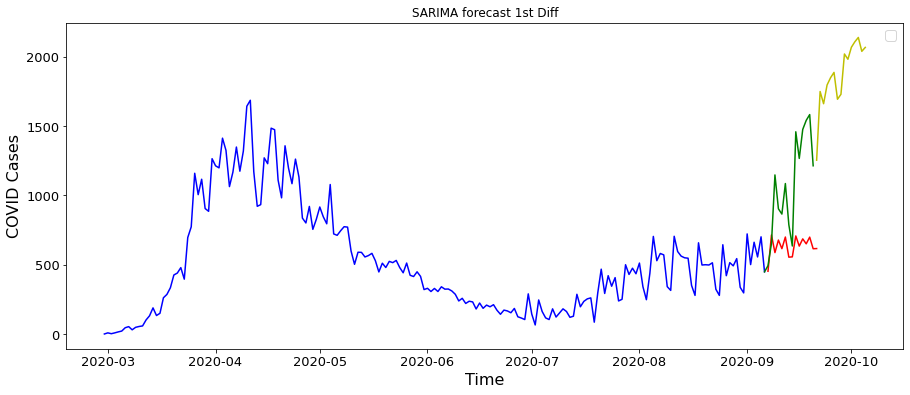

In [134]:
# Fit the model on difference
#after comparing this is better
train_ratio = 0.93 # this will leave the last 15 days as the test set
split_point = int(round(len(ts)*train_ratio))

training = ts[0: split_point]
testing = ts[split_point-1:]
original = ts[split_point-1:]

model = SARIMAX(training, order=(2,1,2), seasonal_order=(1,0,0,7), 
              enforce_stationarity=False, enforce_invertibility=False)

model_fit = model.fit(disp=-1)

forecast = model_fit.forecast(len(testing))

model = SARIMAX(ts, order=(2,1,2), seasonal_order=(1,0,0,7), 
                enforce_stationarity=False, enforce_invertibility=False)

model_fit = model.fit(disp=-1)

forecast2 = model_fit.forecast(15)

print(forecast)

# Plot the model 
plt.figure(figsize=(15,6))
plt.plot(forecast, 'r')
plt.plot(training, 'b')
plt.plot(forecast2, 'y')
plt.plot(original, 'g')
plt.title('SARIMA forecast 1st Diff')
plt.xlabel('Time', size=16) 
plt.ylabel('COVID Cases', size=16)
plt.tick_params(labelsize=13)
plt.legend(loc='upper right', fontsize=14)

print('BIC Seasonal ARIMA:', model_fit.bic)
print('AIC Seasonal ARIMA:', model_fit.aic)
print('MSE Seasonal ARIMA:', mse(testing,forecast))

C:\Users\91999\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
C:\Users\91999\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
No handles with labels found to put in legend.


2020-09-07    6.053600
2020-09-08    6.510144
2020-09-09    6.237434
2020-09-10    6.340034
2020-09-11    6.293843
2020-09-12    6.419351
2020-09-13    6.196984
2020-09-14    6.205260
2020-09-15    6.390668
2020-09-16    6.229772
2020-09-17    6.262659
2020-09-18    6.287795
2020-09-19    6.369375
2020-09-20    6.228059
Freq: D, dtype: float64
BIC Seasonal ARIMA: 48.66772924541577
AIC Seasonal ARIMA: 21.219025180169936
MSE Seasonal ARIMA: 0.520444913002047


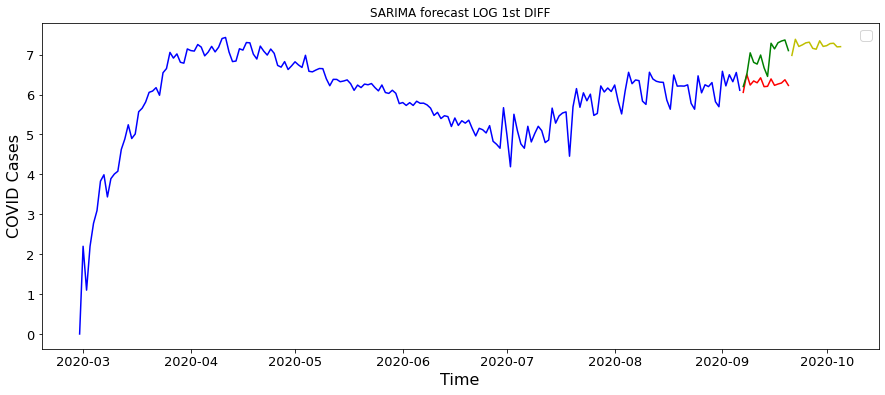

In [135]:
# Fit the model on log difference
train_ratio = 0.93 # this will leave the last 30 months as the test set
split_point = int(round(len(ts_log)*train_ratio))

training = ts_log[0: split_point]
testing = ts_log[split_point:]
original = ts_log[split_point:]

model = SARIMAX(training, order=(7,1,0), seasonal_order=(1,0,0,41),
              enforce_stationarity=False, enforce_invertibility=False)

model_fit = model.fit(disp=-1)

forecast = model_fit.forecast(len(testing))

model = SARIMAX(ts_log, order=(7,1,0), seasonal_order=(1,0,0,41),
                enforce_stationarity=False, enforce_invertibility=False)

model_fit = model.fit(disp=-1)

forecast2 = model_fit.forecast(15)

print(forecast)

# Plot the model 
plt.figure(figsize=(15,6))
plt.plot(forecast, 'r')
plt.plot(training, 'b')
plt.plot(forecast2, 'y')
plt.plot(original, 'g')
plt.title('SARIMA forecast LOG 1st DIFF')
plt.xlabel('Time', size=16) 
plt.ylabel('COVID Cases', size=16)
plt.tick_params(labelsize=13)
plt.legend(loc='upper right', fontsize=14)

print('BIC Seasonal ARIMA:', model_fit.bic)
print('AIC Seasonal ARIMA:', model_fit.aic)
print('MSE Seasonal ARIMA:', mse(testing,forecast))

#refer last graph for legends

# NEURAL NETWORK

In [44]:
# Set the training data
ts_train = ts[:-15]

# Scale the time series
scaler = MinMaxScaler(feature_range=(0, 1))

# Fit the min-max scaler only on the train data to avoid information leakage
fitted_transformer = scaler.fit(ts_train.values.reshape(-1,1))

# Scale both the train and test data
data = fitted_transformer.transform(ts.values.reshape(-1,1))

# Define our time window
time_window = 30

# Convert the data into X with size equal to the time window
# Get y as the output for each time window
X7, Y7 = [], []

for i in range(time_window, len(data)):
    X7.append(data[i-time_window:i, 0])
    Y7.append(data[i, 0])

# Convert X and Y to numpy array
X7 = np.array(X7)
Y7 = np.array(Y7)

# Split the data into train test validation
# Train data is all data minus the test
X_train7 = X7[:-15, :]
Y_train7 = Y7[:-15]

# Validation data is the last few months from the training data
# This is only for our early stopping
X_val7 = X7[-30:-15, :]
Y_val7 = Y7[-30:-15]

# Test data is the last few months from the training data
# plus additional 15 days of unseen data
# This is actually our validation data
X_test7 = X7[-30:, :]
Y_test7 = Y7[-30:]

# Create and Train ANN Model
keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

In [52]:
# Define our ANN model
model7 = Sequential()

# Input layer
model7.add(Dense(100, input_dim=time_window, activation='relu'))

# Dropout Layer
model7.add(Dropout(0.2))

# Hidden layers
model7.add(Dense(45, activation='linear'))
model7.add(Dense(15, activation='linear'))

# Output layer
model7.add(Dense(1))

# Compile the ANN model
model7.compile(optimizer = 'adadelta', loss = 'mse')
model7.summary()

# Fit the ANN model, use early stopping with patience=20 to avoid overfitting
history7 = model7.fit(X_train7, Y_train7, validation_data = (X_val7, Y_val7),
                    epochs=150, batch_size=20, verbose = 1, 
                    callbacks=[EarlyStopping(patience=20,monitor='val_loss')])


Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_5 (Dense)              (None, 100)               3100      
_________________________________________________________________
dropout_2 (Dropout)          (None, 100)               0         
_________________________________________________________________
dense_6 (Dense)              (None, 45)                4545      
_________________________________________________________________
dense_7 (Dense)              (None, 15)                690       
_________________________________________________________________
dense_8 (Dense)              (None, 1)                 16        
Total params: 8,351
Trainable params: 8,351
Non-trainable params: 0
_________________________________________________________________
Train on 160 samples, validate on 15 samples
Epoch 1/150
160/160 [==============================] - 3s 16ms/step - los

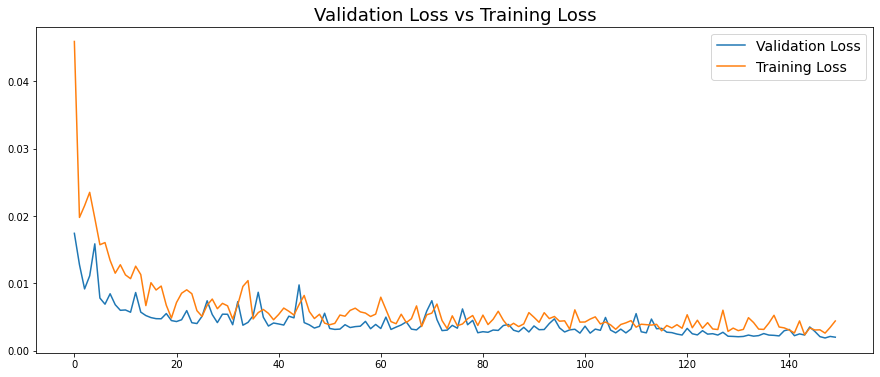

In [46]:
# Plot the validation loss
plt.figure(figsize=(15, 6))
plt.title('Validation Loss vs Training Loss', size=18)
plt.plot(history7.history['val_loss'], label='Validation Loss')
plt.plot(history7.history['loss'], label='Training Loss')
plt.legend(loc='upper right', fontsize=14)
plt.savefig('Validation Loss vs Training Loss',
            bbox_inches='tight', dpi=300)
plt.show()

In [54]:
test_size7 = 15
start7 = -test_size7*2

prediction7 = np.copy(data[:len(data)])

# Recursivelly call the ANN model and append the prediction to 
# Get multi step ahead prediction
for i in range(len(data)-test_size7, len(data)+test_size7):
    last_feature = np.reshape(prediction7[i-time_window:i], (1,time_window))
    next_pred = model7.predict(last_feature)
    prediction7 = np.append(prediction7, next_pred)

# Create x-axis for the plot
import datetime
start_date = datetime.datetime(2020, 2, 29)
end_date = datetime.datetime(2020, 9, 20)
x_date = pd.date_range(start_date, end_date, freq='D')
forecast_date = datetime.datetime(2020, 10, 5)
predict_date = pd.date_range(end_date, forecast_date , freq='D')

# Reshape and convert the scaled prediction to original form
prediction7 = prediction7.reshape(-1,1)
prediction7 = scaler.inverse_transform(prediction7)[-30:]
test_data7 = ts[-15:]
data_unscaled7 = ts[:-test_size7]
#test_data7 = ts[-15:]


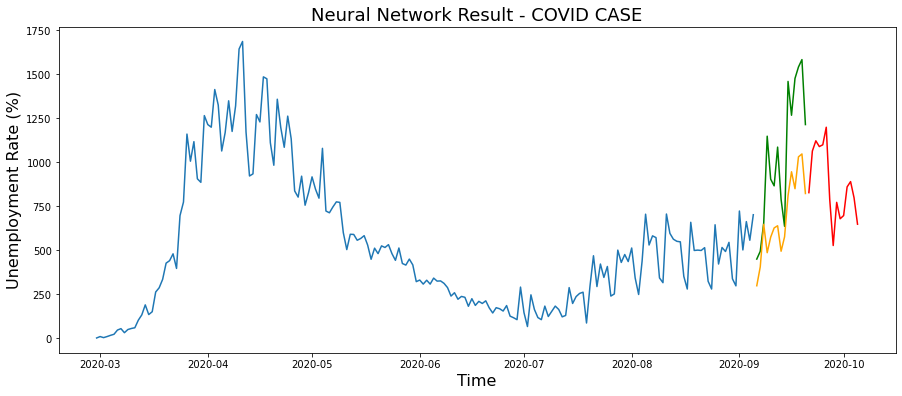

In [125]:
# Plot the resulting forecasts
plt.figure(figsize=(15, 6))
plt.title('Neural Network Result - COVID CASE', size=18)
plt.plot(x_date[:-15],data_unscaled7, label='Training Data')
plt.plot(x_date[-15:], test_data7, 'g', label='Testing Data')
plt.plot(x_date[-15:], prediction7[-30:-15],'orange', label='In Sample Prediction')
plt.plot(predict_date[-15:], prediction7[-15:],'r', label='Out of Sample Prediction')
plt.xlabel('Time', size=16)
plt.ylabel('Unemployment Rate (%)', size=16)
#plt.legend(loc = 'upper right', fontsize=14)
plt.savefig('NN Results (ANN)',
            bbox_inches='tight', dpi=300)
plt.show()


In [59]:
# Calculate the test mse
print("MSE Artifical Neural Network (model 1):", mse(prediction7[-15:].reshape(-1,),ts[-15:]))

# Show 12 months predictions:
print('First 15-Days Predictions:\n',prediction7[-15:])

# Store the results in a csv file
final_result = pd.DataFrame({"Months":x_date[-15:], 
                         "Unemployment_Rates":np.round(prediction7[-15:].reshape(-1,),3),
                           })
final_result.set_index('Months',inplace=True)
final_result.to_csv('Predicted_Unemployment_Rates.csv', date_format='%b-%Y') 


MSE Artifical Neural Network (model 1): 245669.1350152391
First 15-Days Predictions:
 [[ 826.37260866]
 [1062.5315721 ]
 [1120.76036453]
 [1088.12418818]
 [1098.12878799]
 [1197.86884546]
 [ 787.30781472]
 [ 526.12686265]
 [ 771.16929603]
 [ 678.03085113]
 [ 696.22709155]
 [ 858.97074318]
 [ 889.15558028]
 [ 797.14534163]
 [ 647.10991967]]
